<a href="https://colab.research.google.com/github/Golden-Adreet/ODE_Solving_Methodes/blob/master/Euler_ODE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
def dshm(x,y,t,k,lam):
  dxdt = y
  dydt = -(k*x + lam*y)/m
  return np.array([dxdt, dydt])

<ipython-input-20-9b3e2575024b>:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


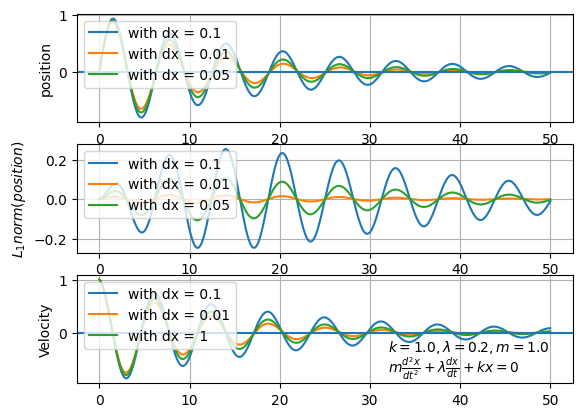

In [ ]:
k, lam, m = 1.0, 0.2, 1.0
H = [0.1,0.01,0.05]
ti = 0
t = ti
xi =0
yi = 1
tf = 50.0
for h in H:
  a = f'Euler_methode_ODE2_with_dt_{h}.dat'
  fp = open(a,'w')
  t = ti
  x = xi;y=yi
  s = int((tf-ti)/h)
  fp.write(f'{t},{x},{y}\n')
  for _ in range(s):
    if h == 0.2:print(t, x, y)
    dxdt,dydt = dshm(x,y,t,k,lam)
    x+=h*dxdt
    y+=h*dydt
    t+=h
    fp.write(f'{t},{x},{y}\n')
  fp.close()
a = np.loadtxt(f'Euler_methode_ODE2_with_dt_0.1.dat',delimiter = ',')
a1,b1,c1 = a[:,0],a[:,1],a[:,2]
a = np.loadtxt(f'Euler_methode_ODE2_with_dt_0.01.dat',delimiter = ',')
a2,b2,c2 = a[:,0],a[:,1],a[:,2]
a = np.loadtxt(f'Euler_methode_ODE2_with_dt_0.05.dat',delimiter = ',')
a3,b3,c3 = a[:,0],a[:,1],a[:,2]
plt.figure(1)
plt.title('Weakly Damped Harmonic Motion (Euler)')
plt.subplot(3,1,1)
plt.plot(a1,b1,a2,b2,a3,b3)
plt.legend(['with dx = 0.1','with dx = 0.01','with dx = 0.05'],loc='best')
plt.axhline()
plt.xticks()
plt.grid()
plt.ylabel('position')
plt.subplot(3,1,2)
dis = k/m - lam**2/(4.0*m**2)
w = np.sqrt(dis)
phi = np.pi/2
plt.plot(a1,b1-np.exp(-lam*a1/(2.0*m))*np.cos(w*a1-phi),a2,b2-np.exp(-lam*a2/(2.0*m))*np.cos(w*a2-phi),a3,b3-np.exp(-lam*a3/(2.0*m))*np.cos(w*a3-phi))
plt.legend(['with dx = 0.1','with dx = 0.01','with dx = 0.05'],loc='best')
plt.xticks()
plt.grid()
plt.ylabel(r'$L_1 norm(position)$')
plt.subplot(3,1,3)
plt.plot(a1,c1,a2,c2,a3,c3)
plt.legend(['with dx = 0.1','with dx = 0.01','with dx = 1'],loc='best')
plt.axhline()
plt.xticks()
plt.ylabel('Velocity')
plt.grid()
plt.text(32,-0.35,r'$k='+str(k)+', \lambda=' + str(lam)+', m=' + str(m)+'$')
plt.text(32,-0.75,r'$m\frac{d^2x}{dt^2}+\lambda\frac{dx}{dt}+kx=0$')
plt.show()